In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = "https://github.com/ozlerhakan/mongodb-json-files/blob/master/datasets/grades.json"
req = requests.get(url)

In [3]:
req

<Response [200]>

In [4]:
soup = BeautifulSoup(req.content)

In [5]:
soup

<!DOCTYPE html>
<html data-a11y-animated-images="system" data-a11y-link-underlines="true" data-color-mode="auto" data-dark-theme="dark" data-light-theme="light" lang="en">
<head>
<meta charset="utf-8"/>
<link href="https://github.githubassets.com" rel="dns-prefetch"/>
<link href="https://avatars.githubusercontent.com" rel="dns-prefetch"/>
<link href="https://github-cloud.s3.amazonaws.com" rel="dns-prefetch"/>
<link href="https://user-images.githubusercontent.com/" rel="dns-prefetch"/>
<link crossorigin="" href="https://github.githubassets.com" rel="preconnect"/>
<link href="https://avatars.githubusercontent.com" rel="preconnect"/>
<link crossorigin="anonymous" href="https://github.githubassets.com/assets/light-f13f84a2af0d.css" media="all" rel="stylesheet"/><link crossorigin="anonymous" href="https://github.githubassets.com/assets/dark-1ee85695b584.css" media="all" rel="stylesheet"/><link crossorigin="anonymous" data-color-theme="dark_dimmed" data-href="https://github.githubassets.com/

# 1.DataFrame containing exam, quiz, and homework scores extracted from the JSON file.

In [6]:
url = "https://github.com/ozlerhakan/mongodb-json-files/raw/master/datasets/grades.json"

# Download the JSON file locally
filename = "grades.json"
response = requests.get(url)
with open(filename, "wb") as f:
    f.write(response.content)

# Read the JSON file using Pandas
df = pd.read_json(filename, lines=True)


In [7]:
def new_1(val1):
    return val1[0]['score']

df['exam_score']=df['scores'].apply(new_1)

def new_2(val2):
    return val2[1]['score']

df['quiz_score']=df['scores'].apply(new_2)

def new_3(val3):
    one=val3[-3]['score']
    two=val3[-2]['score']
    three=val3[-1]['score']
    return round((one+two+three)/3.2)

df['homework_sccore']=df['scores'].apply(new_3)

In [8]:
df

,_id,student_id,class_id,scores,exam_score,quiz_score,homework_sccore
0,{'$oid': '50b59cd75bed76f46522c34e'},0,2,"[{'type': 'exam', 'score': 57.92947112575566},...",57.929471,21.245426,48
1,{'$oid': '50b59cd75bed76f46522c34f'},0,28,"[{'type': 'exam', 'score': 39.17749400402234},...",39.177494,78.441728,55
2,{'$oid': '50b59cd75bed76f46522c350'},0,5,"[{'type': 'exam', 'score': 88.22950674232497},...",88.229507,79.289627,41
3,{'$oid': '50b59cd75bed76f46522c351'},0,16,"[{'type': 'exam', 'score': 59.1805667559299}, ...",59.180567,47.589602,48
4,{'$oid': '50b59cd75bed76f46522c352'},0,24,"[{'type': 'exam', 'score': 4.444435759027499},...",4.444436,28.630579,62
...,...,...,...,...,...,...,...
275,{'$oid': '50b59cd75bed76f46522c461'},48,10,"[{'type': 'exam', 'score': 19.75901367795435},...",19.759014,88.302701,29
276,{'$oid': '50b59cd75bed76f46522c462'},48,14,"[{'type': 'exam', 'score': 66.79008851052096},...",66.790089,6.835625,49
277,{'$oid': '50b59cd75bed76f46522c463'},48,8,"[{'type': 'exam', 'score': 87.50309579619501},...",87.503096,77.950480,54
278,{'$oid': '50b59cd75bed76f46522c464'},48,15,"[{'type': 'exam', 'score': 17.49112864462374},...",17.491129,26.629811,49


# 2.Sample DataFrame with scores column, extracted using regular expressions.

In [9]:
# Sample DataFrame with scores column
#Initialization: Initialize empty lists to store scores for each type of assessment (exam, quiz, homework).
df1 = pd.DataFrame({
    'scores': [
        [{'type': 'exam', 'score': 57.92947112575566},
         {'type': 'quiz', 'score': 21.24542588206755},
         {'type': 'homework', 'score': 68.1956781058743},
         {'type': 'homework', 'score': 67.95019716560351},
         {'type': 'homework', 'score': 18.81037253352722}],
        [{'type': 'exam', 'score': 75.0},
         {'type': 'quiz', 'score': 80.0},
         {'type': 'homework', 'score': 85.0},
         {'type': 'homework', 'score': 90.0},
         {'type': 'homework', 'score': 95.0}],
        # Add more rows as needed
    ]
})



In [10]:
# Initialize lists for each type of score
exam_scores = []
quiz_scores = []
homework_scores = []

In [11]:
# Define regular expression patterns to match each type of score
#Regular Expression Patterns: Define regular expression patterns to match each type of score in the nested dictionaries.
exam_pattern = r"'type': 'exam', 'score': (\d+\.\d+)"
quiz_pattern = r"'type': 'quiz', 'score': (\d+\.\d+)"
homework_pattern = r"'type': 'homework', 'score': (\d+\.\d+)"

In [12]:
# Iteration: Iterate over each row in the "scores" column of the DataFrame.
for item in df1['scores']:
    # Convert the row to a string representation
    item_str = str(item)
    # Use regular expressions to find scores of each type
    exam_match = re.search(exam_pattern, item_str)
    quiz_match = re.search(quiz_pattern, item_str)
    homework_match = re.findall(homework_pattern, item_str)
    # Extract and append scores to the respective lists
    if exam_match:
        exam_scores.append(float(exam_match.group(1)))
    else:
        exam_scores.append(None)
    if quiz_match:
        quiz_scores.append(float(quiz_match.group(1)))
    else:
        quiz_scores.append(None)
    if homework_match:
        homework_scores.append([float(score) for score in homework_match])
    else:
        homework_scores.append([])


In [13]:
# Add new columns to the DataFrame for each type of score
df1['exam_score'] = exam_scores
df1['quiz_score'] = quiz_scores
df1['homework_scores'] = homework_scores

In [14]:
df1

,scores,exam_score,quiz_score,homework_scores
0,"[{'type': 'exam', 'score': 57.92947112575566},...",57.929471,21.245426,"[68.1956781058743, 67.95019716560351, 18.81037..."
1,"[{'type': 'exam', 'score': 75.0}, {'type': 'qu...",75.000000,80.000000,"[85.0, 90.0, 95.0]"


# 3.DataFrame with column names _id, student_id, class_id, scores, exam_scores, quiz_scores, homework_scores, total_score.

In [15]:
# Sample DataFrame with column names
data = {
    '_id': [1, 2, 3],
    'student_id': [101, 102, 103],
    'class_id': [1, 1, 2],
    'scores': [
        [{'type': 'exam', 'score': 80}, {'type': 'quiz', 'score': 85}, {'type': 'homework', 'score': 90}],
        [{'type': 'exam', 'score': 75}, {'type': 'quiz', 'score': 70}, {'type': 'homework', 'score': 80}],
        [{'type': 'exam', 'score': 90}, {'type': 'quiz', 'score': 95}, {'type': 'homework', 'score': 85}]
    ]
}


In [16]:
# Create DataFrame
df2 = pd.DataFrame(data)

In [17]:
# Calculate exam_scores, quiz_scores, and homework_scores
df2['exam_scores'] = df['scores'].apply(lambda x: [item['score'] for item in x if item['type'] == 'exam'])
df2['quiz_scores'] = df['scores'].apply(lambda x: [item['score'] for item in x if item['type'] == 'quiz'])
df2['homework_scores'] = df['scores'].apply(lambda x: [item['score'] for item in x if item['type'] == 'homework'])


In [18]:
# Calculate total scores for each student
df2['total_score'] = df2['exam_scores'] + df2['quiz_scores'] + df2['homework_scores']
df2

,_id,student_id,class_id,scores,exam_scores,quiz_scores,homework_scores,total_score
0,1,101,1,"[{'type': 'exam', 'score': 80}, {'type': 'quiz...",[57.92947112575566],[21.24542588206755],"[68.1956781058743, 67.95019716560351, 18.81037...","[57.92947112575566, 21.24542588206755, 68.1956..."
1,2,102,1,"[{'type': 'exam', 'score': 75}, {'type': 'quiz...",[39.17749400402234],[78.44172815491468],"[20.81782269075502, 70.44520452408949, 50.6661...","[39.17749400402234, 78.44172815491468, 20.8178..."
2,3,103,2,"[{'type': 'exam', 'score': 90}, {'type': 'quiz...",[88.22950674232497],[79.28962650427184],"[18.66254946562674, 40.28154176513361, 1.23735...","[88.22950674232497, 79.28962650427184, 18.6625..."


In [19]:
# Ensure the total_score column contains numeric values
df2['total_score'] = pd.to_numeric(df2['total_score'], errors='coerce')
df2

,_id,student_id,class_id,scores,exam_scores,quiz_scores,homework_scores,total_score
0,1,101,1,"[{'type': 'exam', 'score': 80}, {'type': 'quiz...",[57.92947112575566],[21.24542588206755],"[68.1956781058743, 67.95019716560351, 18.81037...",NaN
1,2,102,1,"[{'type': 'exam', 'score': 75}, {'type': 'quiz...",[39.17749400402234],[78.44172815491468],"[20.81782269075502, 70.44520452408949, 50.6661...",NaN
2,3,103,2,"[{'type': 'exam', 'score': 90}, {'type': 'quiz...",[88.22950674232497],[79.28962650427184],"[18.66254946562674, 40.28154176513361, 1.23735...",NaN


In [20]:
# Drop rows with missing total scores, if any
df2 = df2.dropna(subset=['total_score'])
print(df2)
df2

Empty DataFrame
Columns: [_id, student_id, class_id, scores, exam_scores, quiz_scores, homework_scores, total_score]
Index: []


,_id,student_id,class_id,scores,exam_scores,quiz_scores,homework_scores,total_score


# 4.DataFrame with column names _id, student_id, class_id, scores.

In [21]:
# Read the JSON file using Pandas
df3 = pd.read_json(filename, lines=True)

In [22]:
# Extract exam scores using regular expressions
exam_score = [round(float(re.sub('^{.*: |}',' ',str(df3['scores'][i][0]))),2) for i in range(len(df3['scores']))]

# Extract quiz scores using regular expressions
quiz_score = [round(float(re.sub('^{.*: |}',' ',str(df3['scores'][i][1]))),2) for i in range(len(df3['scores']))]

# Extract homework scores using regular expressions
homework_score = [round(float(re.sub('^{.*: |}',' ',str(df3['scores'][i][1]))),2) for i in range(len(df3['scores']))]


In [23]:

# Sample extraction of exam scores using list comprehension
exam_sc = [round(i[0]['score'],2) for i in df3['scores']]


In [24]:
df3.scores[0]

[{'type': 'exam', 'score': 57.92947112575566},
 {'type': 'quiz', 'score': 21.24542588206755},
 {'type': 'homework', 'score': 68.1956781058743},
 {'type': 'homework', 'score': 67.95019716560351},
 {'type': 'homework', 'score': 18.81037253352722}]

In [25]:
df3['scores'][:]

0      [{'type': 'exam', 'score': 57.92947112575566},...
1      [{'type': 'exam', 'score': 39.17749400402234},...
2      [{'type': 'exam', 'score': 88.22950674232497},...
3      [{'type': 'exam', 'score': 59.1805667559299}, ...
4      [{'type': 'exam', 'score': 4.444435759027499},...
                             ...                        
275    [{'type': 'exam', 'score': 19.75901367795435},...
276    [{'type': 'exam', 'score': 66.79008851052096},...
277    [{'type': 'exam', 'score': 87.50309579619501},...
278    [{'type': 'exam', 'score': 17.49112864462374},...
279    [{'type': 'exam', 'score': 26.67878234847454},...
Name: scores, Length: 280, dtype: object

In [26]:
df3['scores'][1][0]

{'type': 'exam', 'score': 39.17749400402234}

In [27]:
df3['scores'][:][0]

[{'type': 'exam', 'score': 57.92947112575566},
 {'type': 'quiz', 'score': 21.24542588206755},
 {'type': 'homework', 'score': 68.1956781058743},
 {'type': 'homework', 'score': 67.95019716560351},
 {'type': 'homework', 'score': 18.81037253352722}]

In [28]:
exam_score = []
for i in range(len(df3['scores'])):
    exam_score.append(df3['scores'][i][0])

In [29]:
exam_score

[{'type': 'exam', 'score': 57.92947112575566},
 {'type': 'exam', 'score': 39.17749400402234},
 {'type': 'exam', 'score': 88.22950674232497},
 {'type': 'exam', 'score': 59.1805667559299},
 {'type': 'exam', 'score': 4.444435759027499},
 {'type': 'exam', 'score': 14.34345947841966},
 {'type': 'exam', 'score': 18.20492211025179},
 {'type': 'exam', 'score': 56.81981513867912},
 {'type': 'exam', 'score': 60.19473636151568},
 {'type': 'exam', 'score': 58.83297411100884},
 {'type': 'exam', 'score': 30.93065784731665},
 {'type': 'exam', 'score': 63.09737877102438},
 {'type': 'exam', 'score': 47.38775906993299},
 {'type': 'exam', 'score': 24.05118737353409},
 {'type': 'exam', 'score': 80.6212442791788},
 {'type': 'exam', 'score': 68.93370297588363},
 {'type': 'exam', 'score': 5.231166018738698},
 {'type': 'exam', 'score': 70.32953992025745},
 {'type': 'exam', 'score': 76.01876674517686},
 {'type': 'exam', 'score': 35.47946463550763},
 {'type': 'exam', 'score': 47.71786215806567},
 {'type': 'exam

In [30]:
re.sub('^{.*: |}',' ',str(exam_score[0]))

' 57.92947112575566 '

In [31]:
exam_score = []
for i in range(len(df3['scores'])):
    exam_score.append(re.sub('^{.*: |}',' ',str(df3['scores'][i][0])))

In [32]:
df3['scores'][1][0]

{'type': 'exam', 'score': 39.17749400402234}

In [33]:
df3['scores'][0][0]

{'type': 'exam', 'score': 57.92947112575566}

In [34]:
exam_score[0]

' 57.92947112575566 '

In [35]:
df3['scores'][1][1]

{'type': 'quiz', 'score': 78.44172815491468}

In [36]:
df3['scores'][0][0]

{'type': 'exam', 'score': 57.92947112575566}

In [37]:
exam_score

[' 57.92947112575566 ',
 ' 39.17749400402234 ',
 ' 88.22950674232497 ',
 ' 59.1805667559299 ',
 ' 4.444435759027499 ',
 ' 14.34345947841966 ',
 ' 18.20492211025179 ',
 ' 56.81981513867912 ',
 ' 60.19473636151568 ',
 ' 58.83297411100884 ',
 ' 30.93065784731665 ',
 ' 63.09737877102438 ',
 ' 47.38775906993299 ',
 ' 24.05118737353409 ',
 ' 80.6212442791788 ',
 ' 68.93370297588363 ',
 ' 5.231166018738698 ',
 ' 70.32953992025745 ',
 ' 76.01876674517686 ',
 ' 35.47946463550763 ',
 ' 47.71786215806567 ',
 ' 88.80822542748272 ',
 ' 95.99100704101919 ',
 ' 95.7950561891157 ',
 ' 86.2587791014086 ',
 ' 8.942018968262111 ',
 ' 31.08963442339938 ',
 ' 0.599873518920623 ',
 ' 5.466727688497352 ',
 ' 44.49334356888737 ',
 ' 46.17925407652636 ',
 ' 60.13912489935064 ',
 ' 91.60286135110157 ',
 ' 0.654309678602604 ',
 ' 67.50593066420024 ',
 ' 15.36563152024366 ',
 ' 73.48459944869943 ',
 ' 73.04238861317688 ',
 ' 21.58296008740177 ',
 ' 43.64758440439862 ',
 ' 22.38732080941065 ',
 ' 33.39752665396672

In [38]:
quiz_score

[21.25,
 78.44,
 79.29,
 47.59,
 28.63,
 47.66,
 60.48,
 15.03,
 64.16,
 49.67,
 55.98,
 69.08,
 9.96,
 77.89,
 40.65,
 65.4,
 9.92,
 66.24,
 47.45,
 94.14,
 82.49,
 42.2,
 70.27,
 99.71,
 0.72,
 66.81,
 78.16,
 78.68,
 48.7,
 89.45,
 82.2,
 16.49,
 77.87,
 65.75,
 60.43,
 15.06,
 75.01,
 27.96,
 3.63,
 62.64,
 61.1,
 92.72,
 91.53,
 34.61,
 80.78,
 0.86,
 29.46,
 8.36,
 67.45,
 3.74,
 32.67,
 68.79,
 48.71,
 11.49,
 69.1,
 1.85,
 8.01,
 16.57,
 11.0,
 5.03,
 86.58,
 32.2,
 90.79,
 12.07,
 63.13,
 18.72,
 24.01,
 45.5,
 61.2,
 10.18,
 5.21,
 26.92,
 4.95,
 59.86,
 82.6,
 87.66,
 81.95,
 50.03,
 1.12,
 97.44,
 74.58,
 51.99,
 72.01,
 20.62,
 1.24,
 95.36,
 90.87,
 15.03,
 68.51,
 44.01,
 3.35,
 45.11,
 12.95,
 74.54,
 85.78,
 44.17,
 70.61,
 57.3,
 73.37,
 92.15,
 61.68,
 47.41,
 58.76,
 78.27,
 72.48,
 3.42,
 16.13,
 45.87,
 64.67,
 3.51,
 79.08,
 27.33,
 59.82,
 23.89,
 3.79,
 35.13,
 48.33,
 25.21,
 26.89,
 82.37,
 75.88,
 11.5,
 99.91,
 41.76,
 77.98,
 95.2,
 82.22,
 55.86,
 3.69,
 

In [39]:
homework_score

[21.25,
 78.44,
 79.29,
 47.59,
 28.63,
 47.66,
 60.48,
 15.03,
 64.16,
 49.67,
 55.98,
 69.08,
 9.96,
 77.89,
 40.65,
 65.4,
 9.92,
 66.24,
 47.45,
 94.14,
 82.49,
 42.2,
 70.27,
 99.71,
 0.72,
 66.81,
 78.16,
 78.68,
 48.7,
 89.45,
 82.2,
 16.49,
 77.87,
 65.75,
 60.43,
 15.06,
 75.01,
 27.96,
 3.63,
 62.64,
 61.1,
 92.72,
 91.53,
 34.61,
 80.78,
 0.86,
 29.46,
 8.36,
 67.45,
 3.74,
 32.67,
 68.79,
 48.71,
 11.49,
 69.1,
 1.85,
 8.01,
 16.57,
 11.0,
 5.03,
 86.58,
 32.2,
 90.79,
 12.07,
 63.13,
 18.72,
 24.01,
 45.5,
 61.2,
 10.18,
 5.21,
 26.92,
 4.95,
 59.86,
 82.6,
 87.66,
 81.95,
 50.03,
 1.12,
 97.44,
 74.58,
 51.99,
 72.01,
 20.62,
 1.24,
 95.36,
 90.87,
 15.03,
 68.51,
 44.01,
 3.35,
 45.11,
 12.95,
 74.54,
 85.78,
 44.17,
 70.61,
 57.3,
 73.37,
 92.15,
 61.68,
 47.41,
 58.76,
 78.27,
 72.48,
 3.42,
 16.13,
 45.87,
 64.67,
 3.51,
 79.08,
 27.33,
 59.82,
 23.89,
 3.79,
 35.13,
 48.33,
 25.21,
 26.89,
 82.37,
 75.88,
 11.5,
 99.91,
 41.76,
 77.98,
 95.2,
 82.22,
 55.86,
 3.69,
 

In [40]:
exam_sc

[57.93,
 39.18,
 88.23,
 59.18,
 4.44,
 14.34,
 18.2,
 56.82,
 60.19,
 58.83,
 30.93,
 63.1,
 47.39,
 24.05,
 80.62,
 68.93,
 5.23,
 70.33,
 76.02,
 35.48,
 47.72,
 88.81,
 95.99,
 95.8,
 86.26,
 8.94,
 31.09,
 0.6,
 5.47,
 44.49,
 46.18,
 60.14,
 91.6,
 0.65,
 67.51,
 15.37,
 73.48,
 73.04,
 21.58,
 43.65,
 22.39,
 33.4,
 46.18,
 98.35,
 55.41,
 7.22,
 62.87,
 54.54,
 24.77,
 28.34,
 62.6,
 7.34,
 43.23,
 89.13,
 40.25,
 11.46,
 85.3,
 84.87,
 58.04,
 32.06,
 68.49,
 64.93,
 73.51,
 56.73,
 85.31,
 24.14,
 76.44,
 85.21,
 69.18,
 46.41,
 8.56,
 13.21,
 9.88,
 49.62,
 43.93,
 30.86,
 78.2,
 26.99,
 74.52,
 93.69,
 83.05,
 99.7,
 79.77,
 99.49,
 36.82,
 22.32,
 94.08,
 4.44,
 84.22,
 26.11,
 77.02,
 53.36,
 25.84,
 69.74,
 25.58,
 96.97,
 75.93,
 65.21,
 43.78,
 50.45,
 28.45,
 47.52,
 19.1,
 49.38,
 24.21,
 16.78,
 46.16,
 33.73,
 18.14,
 92.88,
 86.11,
 12.07,
 7.23,
 61.47,
 46.2,
 64.0,
 55.94,
 27.69,
 82.81,
 32.89,
 89.94,
 90.03,
 47.17,
 21.11,
 30.87,
 55.05,
 84.12,
 50.24,
 

# 5.DataFrame containing exam, quiz, and homework scores extracted using regular expressions, along with additional analyses and visualizations.

In [41]:
# Read the JSON file using Pandas
df4 = pd.read_json(filename, lines=True)

In [42]:
# Extract exam, quiz, and homework scores using regular expressions
df4['exam_scores'] = df4['scores'].apply(lambda x: [float(score['score']) for score in x if score['type'] == 'exam'])
df4['quiz_scores'] = df4['scores'].apply(lambda x: [float(score['score']) for score in x if score['type'] == 'quiz'])
df4['homework_scores'] = df4['scores'].apply(lambda x: [float(score['score']) for score in x if score['type'] == 'homework'])

# Calculate total scores
df4['total_score'] = df4['scores'].apply(lambda x: sum(score['score'] for score in x))


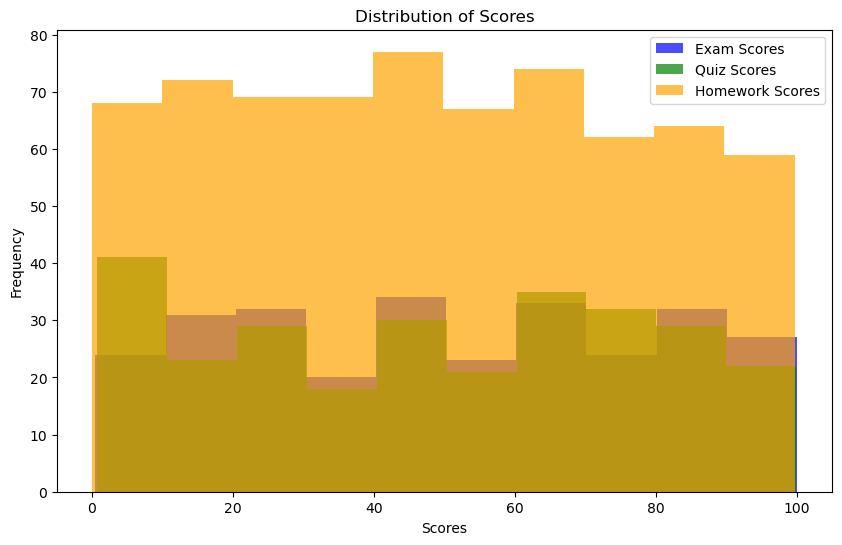

In [43]:
# Visualize distribution of scores for each type of assessment
plt.figure(figsize=(10, 6))
plt.hist(df4['exam_scores'].explode(), bins=10, color='blue', alpha=0.7, label='Exam Scores')
plt.hist(df4['quiz_scores'].explode(), bins=10, color='green', alpha=0.7, label='Quiz Scores')
plt.hist(df4['homework_scores'].explode(), bins=10, color='orange', alpha=0.7, label='Homework Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Scores')
plt.legend()
plt.show()

In [44]:
# Calculate average scores by assessment type
average_scores_by_type = {}
assessment_types = set(score['type'] for scores_list in df4['scores'] for score in scores_list)
for assessment_type in assessment_types:
    scores = [score['score'] for scores_list in df4['scores'] for score in scores_list if score['type'] == assessment_type]
    average_score = sum(scores) / len(scores) if scores else 0
    average_scores_by_type[assessment_type] = average_score

print("Average Scores by Assessment Type:", average_scores_by_type)

Average Scores by Assessment Type: {'quiz': 48.96101312143512, 'homework': 48.71020831276154, 'exam': 50.83113642726236}


In [45]:
# Calculate percentile scores
exam_percentiles = df4['exam_scores'].apply(lambda x: np.percentile(x, [25, 50, 75]))
quiz_percentiles = df4['quiz_scores'].apply(lambda x: np.percentile(x, [25, 50, 75]))
homework_percentiles = df4['homework_scores'].apply(lambda x: np.percentile(x, [25, 50, 75]))

print("Exam Percentiles:\n", exam_percentiles)
print("Quiz Percentiles:\n", quiz_percentiles)
print("Homework Percentiles:\n", homework_percentiles)


Exam Percentiles:
 0      [57.92947112575566, 57.92947112575566, 57.9294...
1      [39.17749400402234, 39.17749400402234, 39.1774...
2      [88.22950674232497, 88.22950674232497, 88.2295...
3      [59.1805667559299, 59.1805667559299, 59.180566...
4      [4.444435759027499, 4.444435759027499, 4.44443...
                             ...                        
275    [19.75901367795435, 19.75901367795435, 19.7590...
276    [66.79008851052096, 66.79008851052096, 66.7900...
277    [87.50309579619501, 87.50309579619501, 87.5030...
278    [17.49112864462374, 17.49112864462374, 17.4911...
279    [26.67878234847454, 26.67878234847454, 26.6787...
Name: exam_scores, Length: 280, dtype: object
Quiz Percentiles:
 0      [21.24542588206755, 21.24542588206755, 21.2454...
1      [78.44172815491468, 78.44172815491468, 78.4417...
2      [79.28962650427184, 79.28962650427184, 79.2896...
3      [47.58960202938239, 47.58960202938239, 47.5896...
4      [28.63057857803885, 28.63057857803885, 28.6305...
    

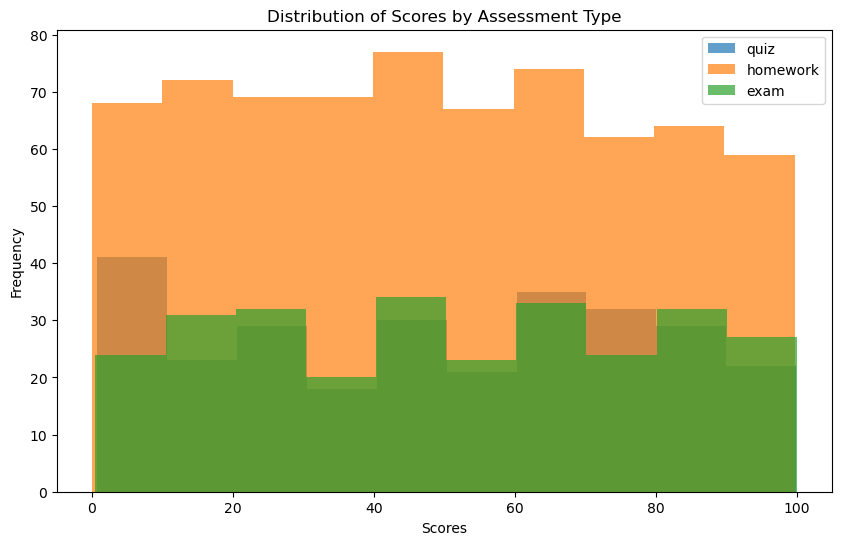

In [46]:
# Plot score distribution for each assessment type
plt.figure(figsize=(10, 6))
for assessment_type in assessment_types:
    scores = [score['score'] for scores_list in df4['scores'] for score in scores_list if score['type'] == assessment_type]
    plt.hist(scores, bins=10, alpha=0.7, label=assessment_type)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Scores by Assessment Type')
plt.legend()
plt.show()

In [47]:
# Extract exam scores and quiz scores
exam_scores = [score['score'] for scores_list in df4['scores'] for score in scores_list if score['type'] == 'exam']
quiz_scores = [score['score'] for scores_list in df4['scores'] for score in scores_list if score['type'] == 'quiz']


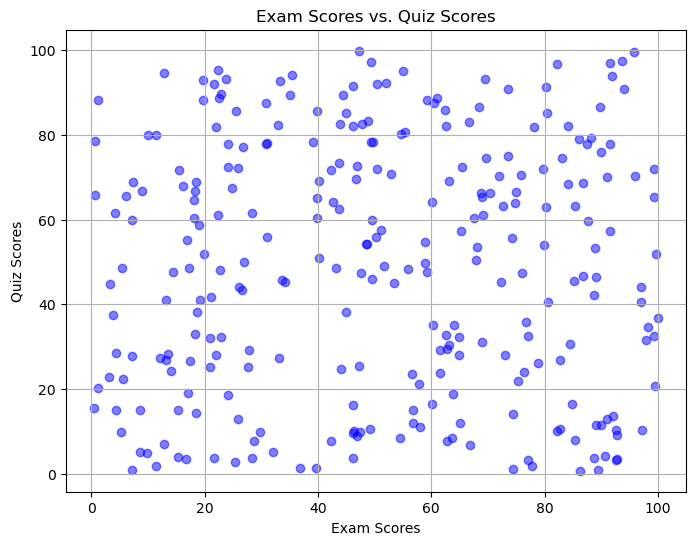

In [48]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(exam_scores, quiz_scores, color='blue', alpha=0.5)
plt.title('Exam Scores vs. Quiz Scores')
plt.xlabel('Exam Scores')
plt.ylabel('Quiz Scores')
plt.grid(True)
plt.show()

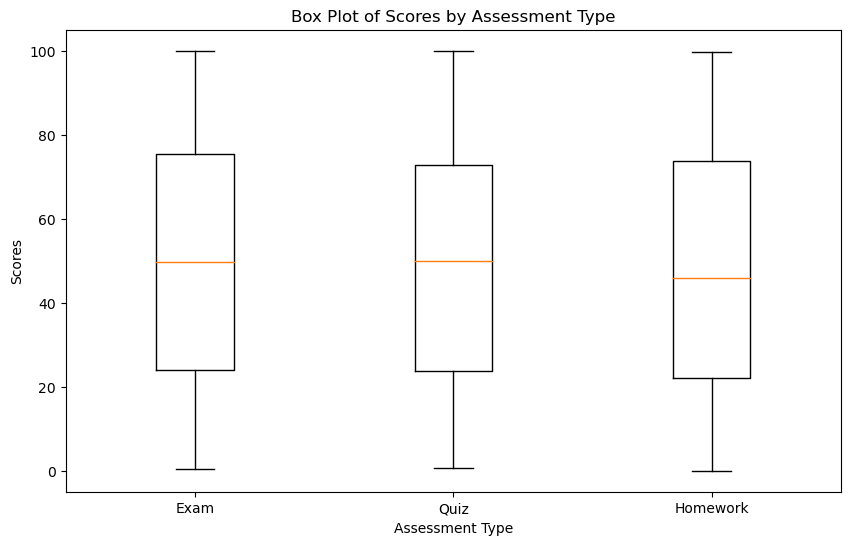

In [49]:
# Create box plot for each assessment type
plt.figure(figsize=(10, 6))
plt.boxplot([
    df4[df4['scores'].apply(lambda x: any(score['type'] == 'exam' for score in x))]['scores'].apply(
        lambda x: next(score['score'] for score in x if score['type'] == 'exam')),
    df4[df4['scores'].apply(lambda x: any(score['type'] == 'quiz' for score in x))]['scores'].apply(
        lambda x: next(score['score'] for score in x if score['type'] == 'quiz')),
    df4[df4['scores'].apply(lambda x: any(score['type'] == 'homework' for score in x))]['scores'].apply(
        lambda x: next(score['score'] for score in x if score['type'] == 'homework'))
],
    labels=['Exam', 'Quiz', 'Homework'])
plt.title('Box Plot of Scores by Assessment Type')
plt.xlabel('Assessment Type')
plt.ylabel('Scores')
plt.show()

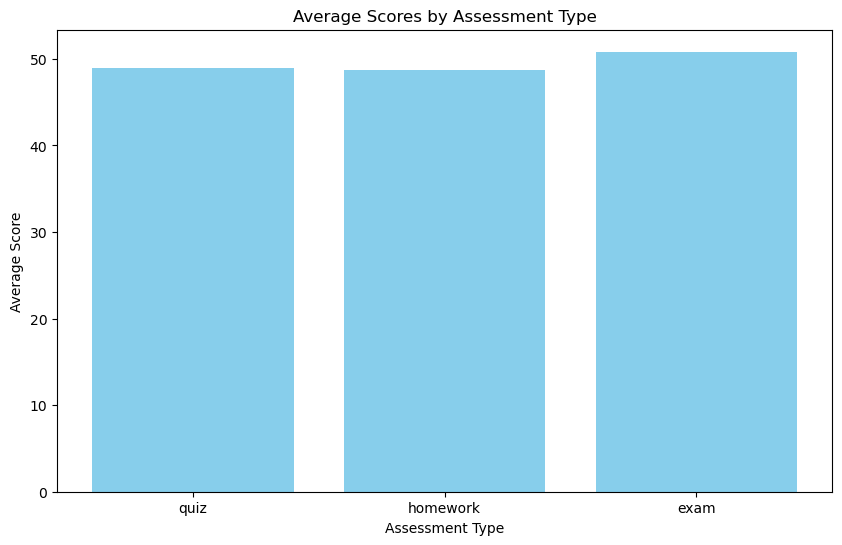

In [50]:
# Create bar plot for average scores by assessment type
plt.figure(figsize=(10, 6))
plt.bar(average_scores_by_type.keys(), average_scores_by_type.values(), color='skyblue')
plt.title('Average Scores by Assessment Type')
plt.xlabel('Assessment Type')
plt.ylabel('Average Score')
plt.show()

# 7.Sample document generator

In [51]:
def generate_documentation(project_flow):
    """
    Generate documentation for a project flow.

    Args:
    project_flow (dict): Dictionary containing the project flow with keys representing each phase and values as descriptions.

    Returns:
    str: Formatted documentation string.
    """
    documentation = "## Project Flows\n\n"
    
    # Iterate over each phase in the project flow
    for phase, description in project_flow.items():
        documentation += f"### {phase}\n"
        documentation += f"{description}\n\n"
    
    return documentation

# Define the project flow
project_flow = {
    "1. Converting JSON Data into a DataFrame": "The first step is to convert the provided JSON data into a structured DataFrame format using Python libraries such as Pandas.",
    "2. Exploring the Data": "Explore the dataset to gain insights into its structure, contents, and characteristics. This includes examining the columns, data types, summary statistics, and any missing or invalid values.",
    "3. Cleaning and Manipulating the Data": "Clean and manipulate the data to prepare it for analysis. This may involve handling missing or invalid values, transforming data types, creating new features, and other data preprocessing tasks.",
    "4. Analysis of Data": "Conduct various analyses to derive meaningful insights. This includes calculating average scores for different assessments, identifying top-performing students, visualizing score distributions, comparing scores across different groups, conducting correlation analysis, identifying trends over time, detecting outliers, and performing cluster analysis.",
    "5. Conclusion": "Draw conclusions based on the analysis results regarding student performance, assessment trends, correlations between scores, outliers, and any other notable findings. Recommendations may also be provided for further action or investigation."
}

# Generate documentation for the project flow
project_documentation = generate_documentation(project_flow)

# Print the generated documentation
print(project_documentation)


## Project Flows

### 1. Converting JSON Data into a DataFrame
The first step is to convert the provided JSON data into a structured DataFrame format using Python libraries such as Pandas.

### 2. Exploring the Data
Explore the dataset to gain insights into its structure, contents, and characteristics. This includes examining the columns, data types, summary statistics, and any missing or invalid values.

### 3. Cleaning and Manipulating the Data
Clean and manipulate the data to prepare it for analysis. This may involve handling missing or invalid values, transforming data types, creating new features, and other data preprocessing tasks.

### 4. Analysis of Data
Conduct various analyses to derive meaningful insights. This includes calculating average scores for different assessments, identifying top-performing students, visualizing score distributions, comparing scores across different groups, conducting correlation analysis, identifying trends over time, detecting outliers, and perfor